Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/ping_pong/'

NMSG = 1_000_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 17:08:25 2025 +0100) (508.28ms ela...,0.435,0.0294,0.458,1.12,0.16,11.87,68.63 C,Nominal
1,(Wed Mar 26 17:08:25 2025 +0100) (507.36ms ela...,1.390,0.0553,0.499,2.03,0.34,25.42,68.25 C,Nominal
2,(Wed Mar 26 17:08:26 2025 +0100) (506.18ms ela...,0.431,0.0224,0.423,0.98,0.20,14.95,68.25 C,Nominal
3,(Wed Mar 26 17:08:26 2025 +0100) (509.72ms ela...,0.296,0.0334,0.404,0.83,0.17,12.20,67.72 C,Nominal
4,(Wed Mar 26 17:08:27 2025 +0100) (508.54ms ela...,2.290,0.0349,0.644,2.97,0.41,27.48,67.72 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(9127, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 17:08:37 2025 +0100) (1008.04ms el...,35.2,0.0379,0.705,36.18,3.81,98.44,64.76 C,Nominal
1,(Wed Mar 26 17:08:38 2025 +0100) (1006.52ms el...,33.0,0.0267,0.575,33.94,3.78,98.05,67.65 C,Nominal
2,(Wed Mar 26 17:08:39 2025 +0100) (1005.02ms el...,33.4,0.0225,0.510,34.25,3.78,99.40,70.00 C,Nominal
3,(Wed Mar 26 17:08:40 2025 +0100) (1004.99ms el...,33.4,0.0261,0.502,34.24,3.78,99.20,72.02 C,Nominal
4,(Wed Mar 26 17:08:41 2025 +0100) (1005.47ms el...,35.2,0.0328,0.583,36.12,3.80,96.63,73.69 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 19:53:19 2025 +0100) (510.24ms ela...,0.1920,0.0000,0.258,0.25,0.03,2.34,40.07 C,Nominal
1,(Wed Mar 26 19:53:19 2025 +0100) (508.11ms ela...,2.6700,0.0364,0.467,2.99,0.46,33.82,40.07 C,Nominal
2,(Wed Mar 26 19:53:20 2025 +0100) (506.88ms ela...,0.3130,0.0000,0.266,0.37,0.08,5.29,40.27 C,Nominal
3,(Wed Mar 26 19:53:20 2025 +0100) (508.51ms ela...,0.0706,0.0000,0.270,0.13,0.05,3.03,40.27 C,Nominal
4,(Wed Mar 26 19:53:21 2025 +0100) (507.99ms ela...,0.1280,0.0000,0.266,0.19,0.08,5.73,40.25 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(7904, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 19:53:30 2025 +0100) (1010.95ms el...,12.3,0.0,0.259,12.71,1.02,99.43,44.05 C,Nominal
1,(Wed Mar 26 19:53:31 2025 +0100) (1008.02ms el...,12.7,0.0,0.338,13.14,1.07,99.58,47.30 C,Nominal
2,(Wed Mar 26 19:53:32 2025 +0100) (1006.87ms el...,17.1,0.0,0.425,17.63,1.63,98.61,50.11 C,Nominal
3,(Wed Mar 26 19:53:33 2025 +0100) (1007.47ms el...,12.3,0.0,0.254,12.78,1.01,99.61,52.00 C,Nominal
4,(Wed Mar 26 19:53:34 2025 +0100) (1007.79ms el...,12.3,0.0,0.258,12.77,1.01,99.63,53.65 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 17:08:25,0.435,0.0294,0.458,1.12,0.16,11.87,68.63,Nominal,508.28
1,2025-03-26 17:08:25,1.390,0.0553,0.499,2.03,0.34,25.42,68.25,Nominal,507.36
2,2025-03-26 17:08:26,0.431,0.0224,0.423,0.98,0.20,14.95,68.25,Nominal,506.18
3,2025-03-26 17:08:26,0.296,0.0334,0.404,0.83,0.17,12.20,67.72,Nominal,509.72
4,2025-03-26 17:08:27,2.290,0.0349,0.644,2.97,0.41,27.48,67.72,Nominal,508.54


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(9127, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 17:08:37,35.2,0.0379,0.705,36.18,3.81,98.44,64.76,Nominal,1008.04
1,2025-03-26 17:08:38,33.0,0.0267,0.575,33.94,3.78,98.05,67.65,Nominal,1006.52
2,2025-03-26 17:08:39,33.4,0.0225,0.510,34.25,3.78,99.40,70.00,Nominal,1005.02
3,2025-03-26 17:08:40,33.4,0.0261,0.502,34.24,3.78,99.20,72.02,Nominal,1004.99
4,2025-03-26 17:08:41,35.2,0.0328,0.583,36.12,3.80,96.63,73.69,Nominal,1005.47


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 19:53:19,0.1920,0.0000,0.258,0.25,0.03,2.34,40.07,Nominal,510.24
1,2025-03-26 19:53:19,2.6700,0.0364,0.467,2.99,0.46,33.82,40.07,Nominal,508.11
2,2025-03-26 19:53:20,0.3130,0.0000,0.266,0.37,0.08,5.29,40.27,Nominal,506.88
3,2025-03-26 19:53:20,0.0706,0.0000,0.270,0.13,0.05,3.03,40.27,Nominal,508.51
4,2025-03-26 19:53:21,0.1280,0.0000,0.266,0.19,0.08,5.73,40.25,Nominal,507.99


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(7904, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 19:53:30,12.3,0.0,0.259,12.71,1.02,99.43,44.05,Nominal,1010.95
1,2025-03-26 19:53:31,12.7,0.0,0.338,13.14,1.07,99.58,47.30,Nominal,1008.02
2,2025-03-26 19:53:32,17.1,0.0,0.425,17.63,1.63,98.61,50.11,Nominal,1006.87
3,2025-03-26 19:53:33,12.3,0.0,0.254,12.78,1.01,99.61,52.00,Nominal,1007.47
4,2025-03-26 19:53:34,12.3,0.0,0.258,12.77,1.01,99.63,53.65,Nominal,1007.79


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


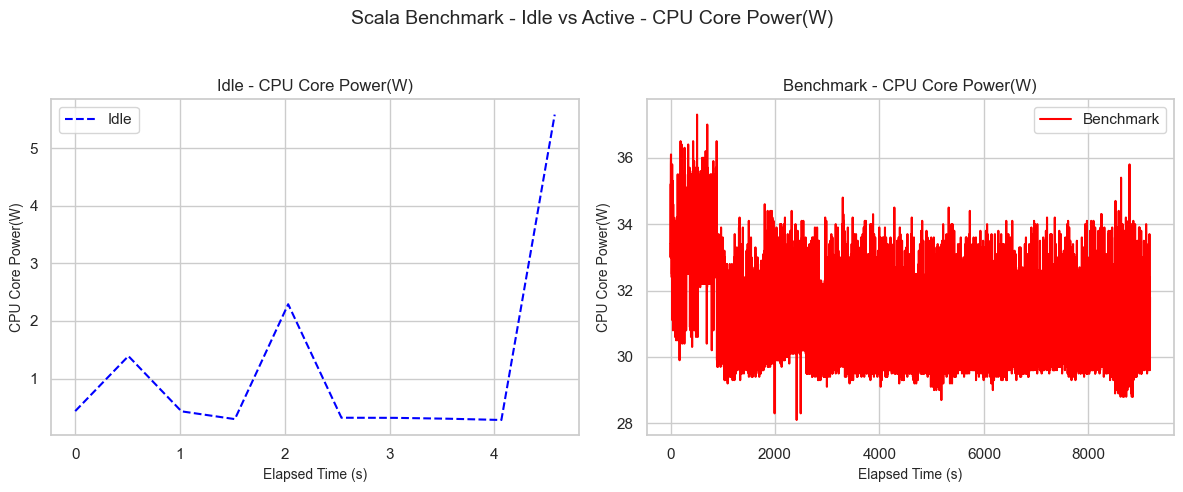

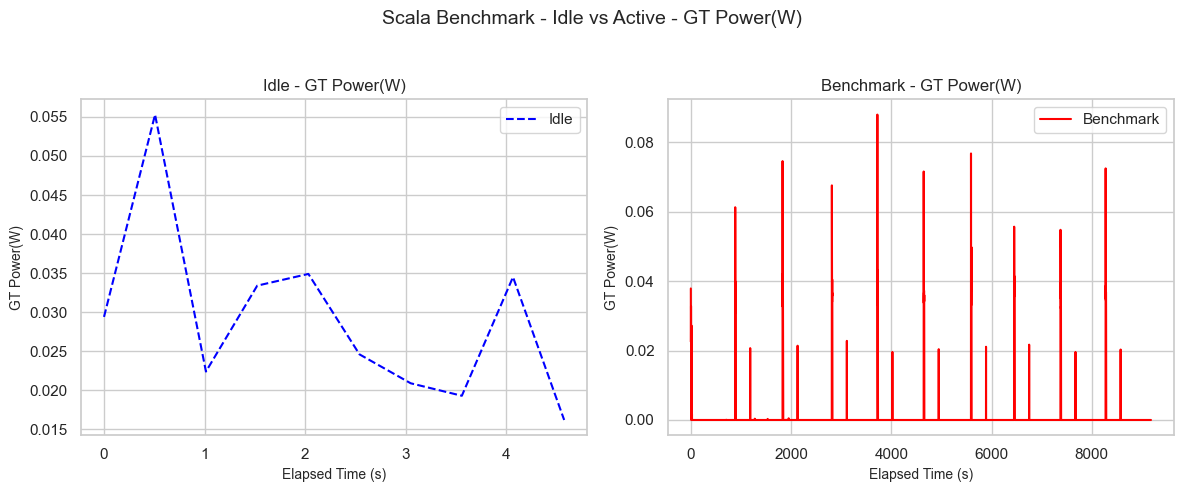

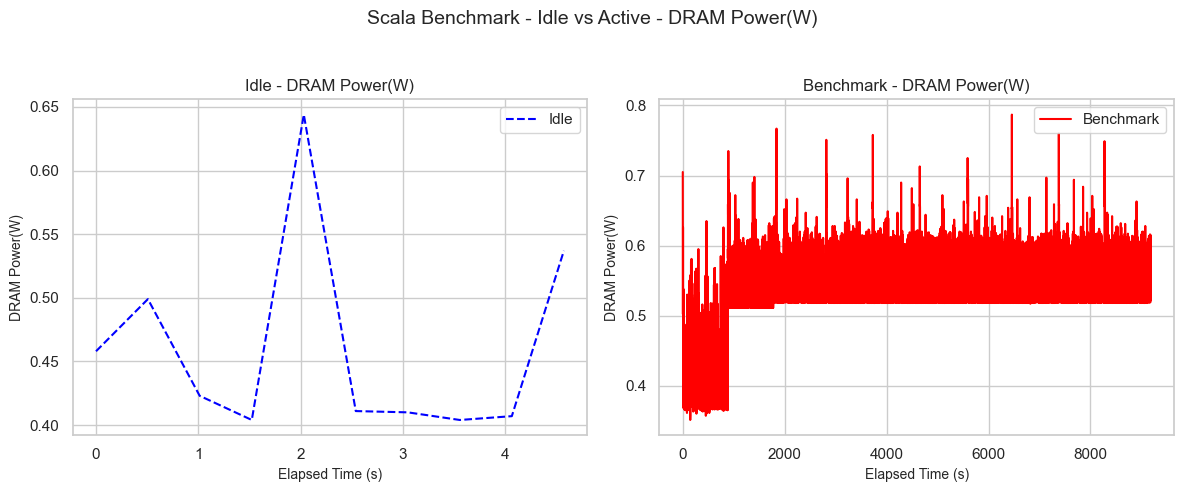

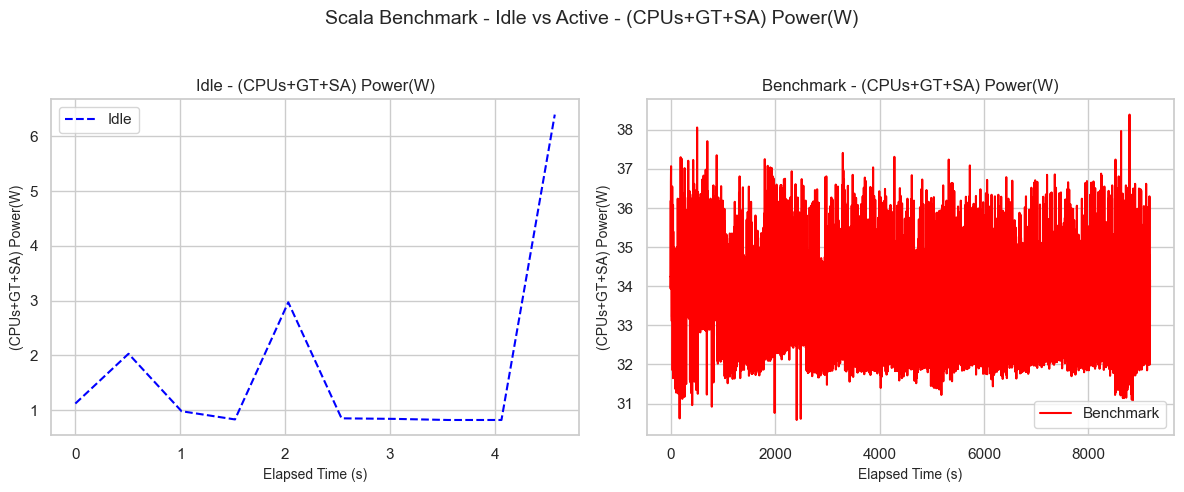

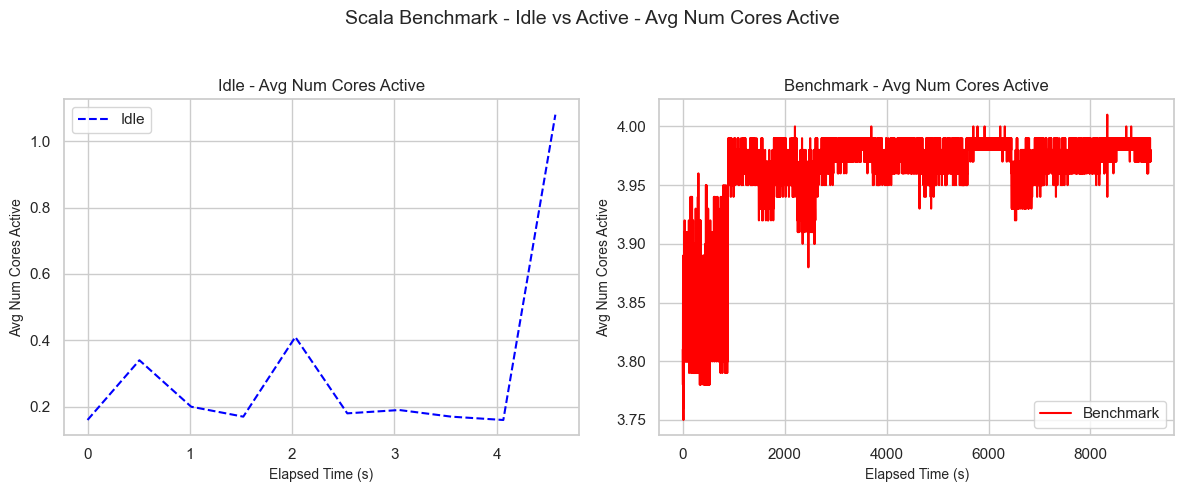

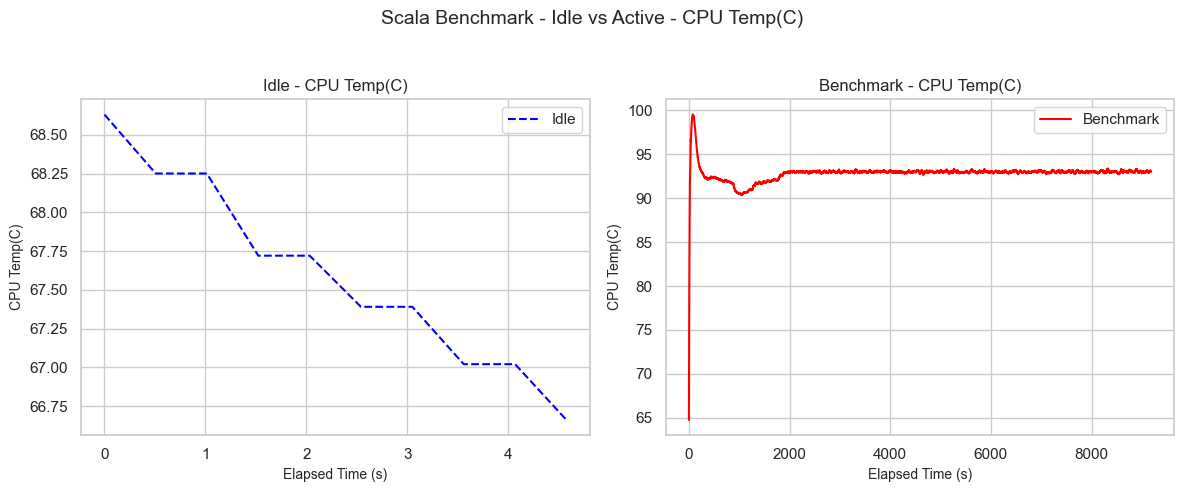

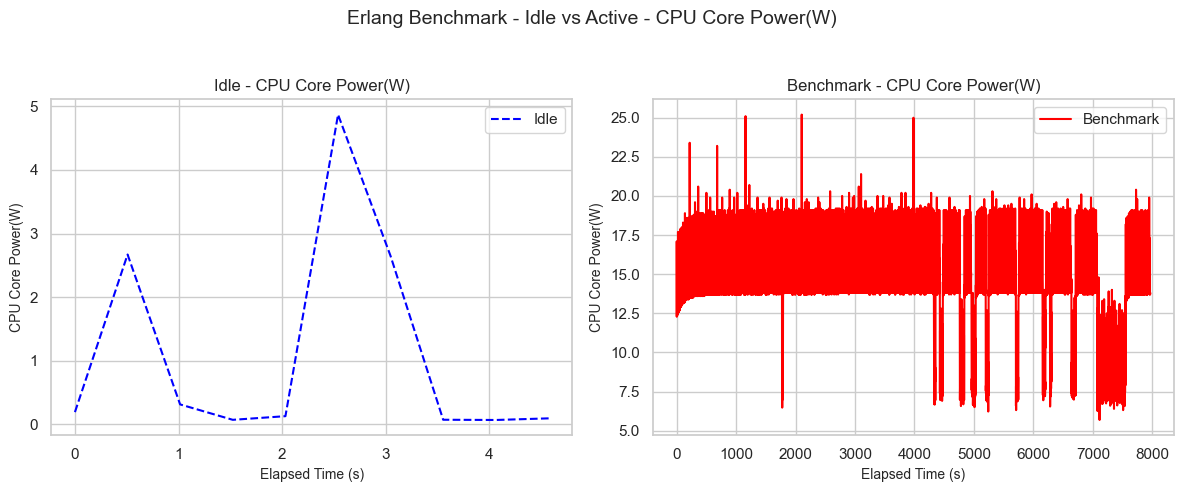

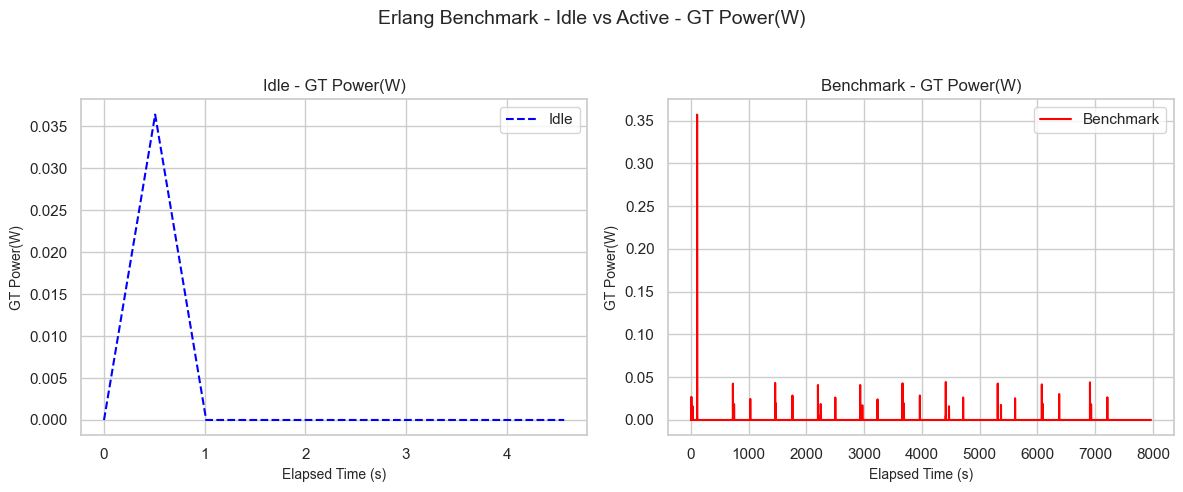

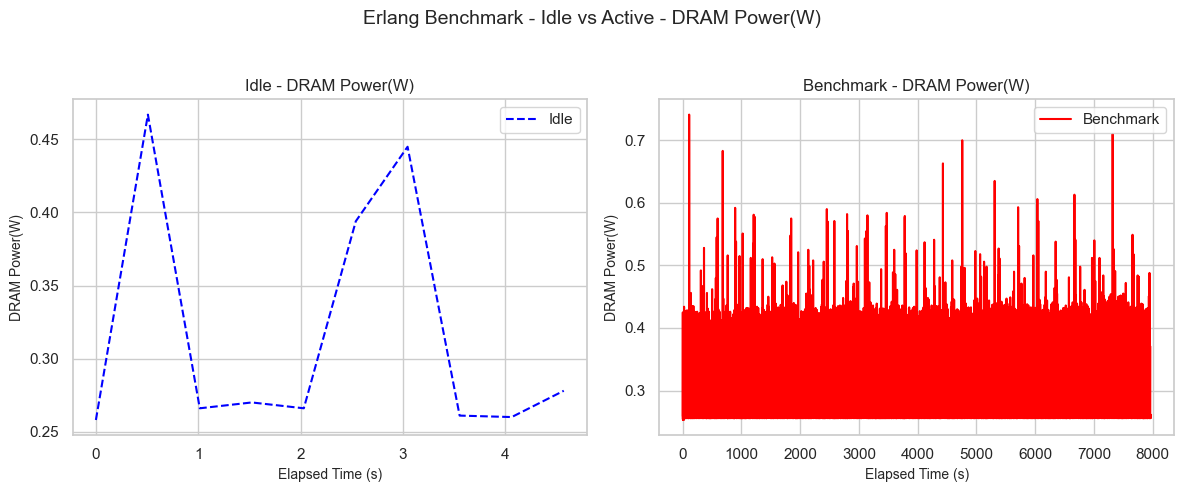

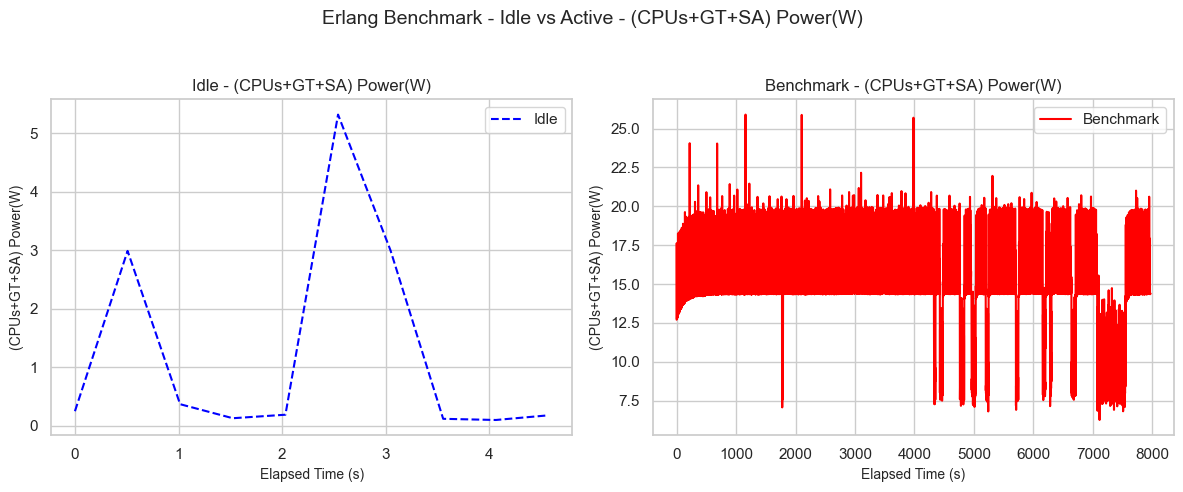

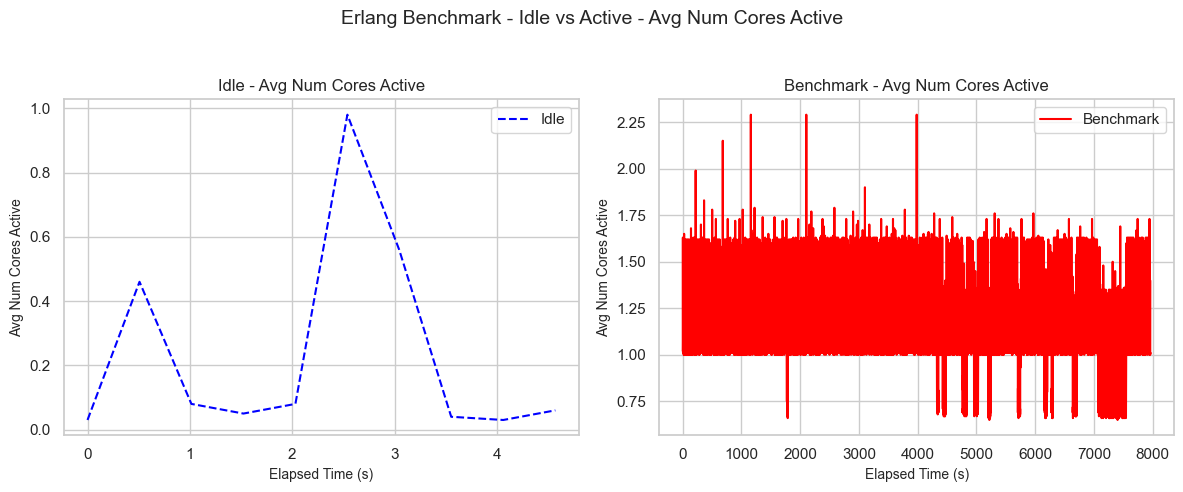

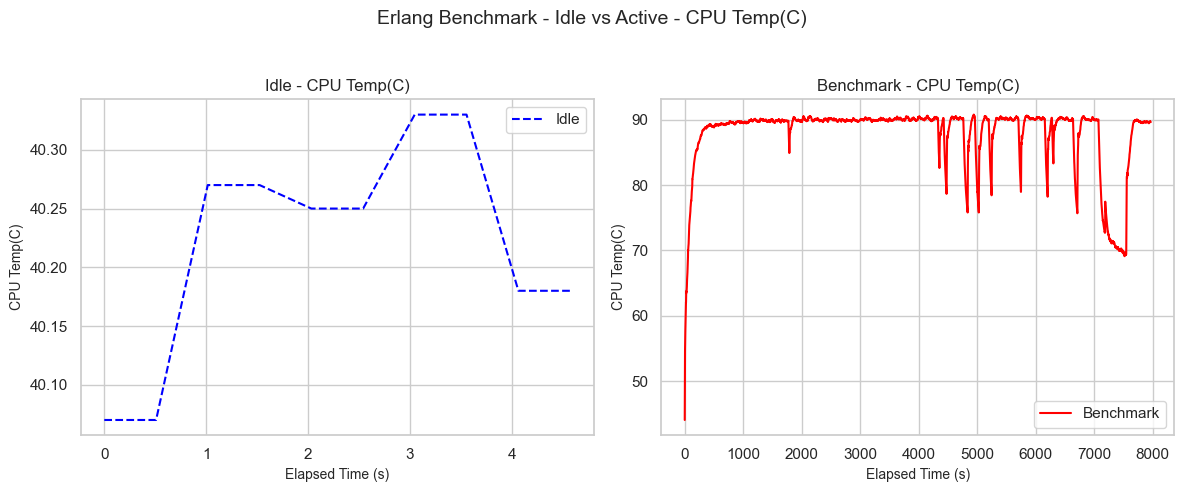

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

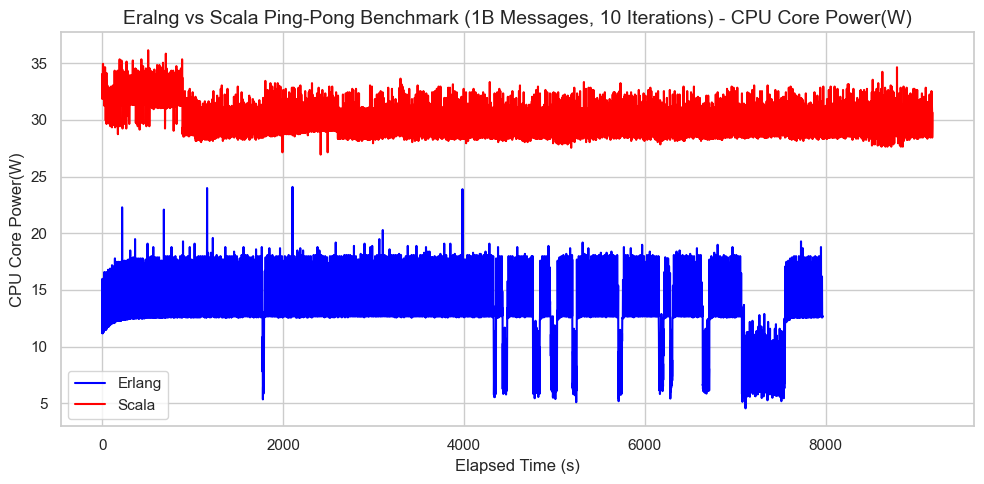

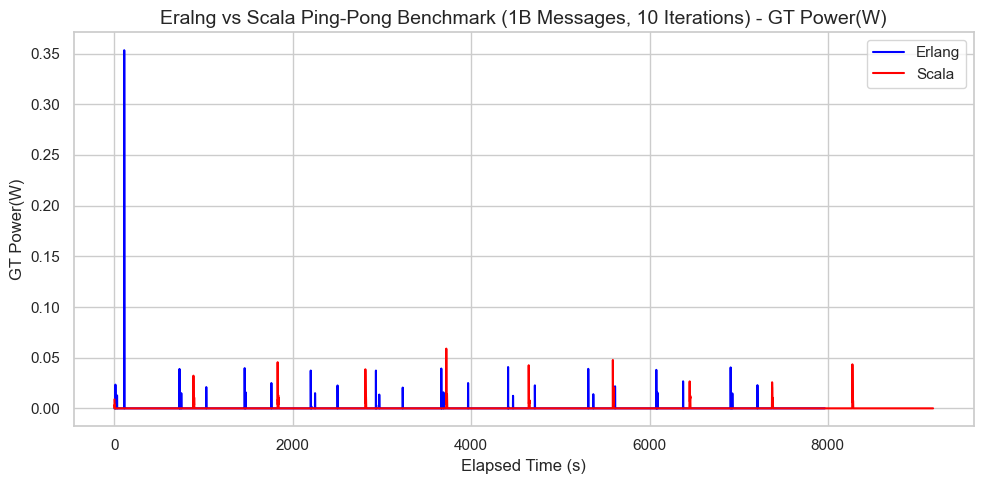

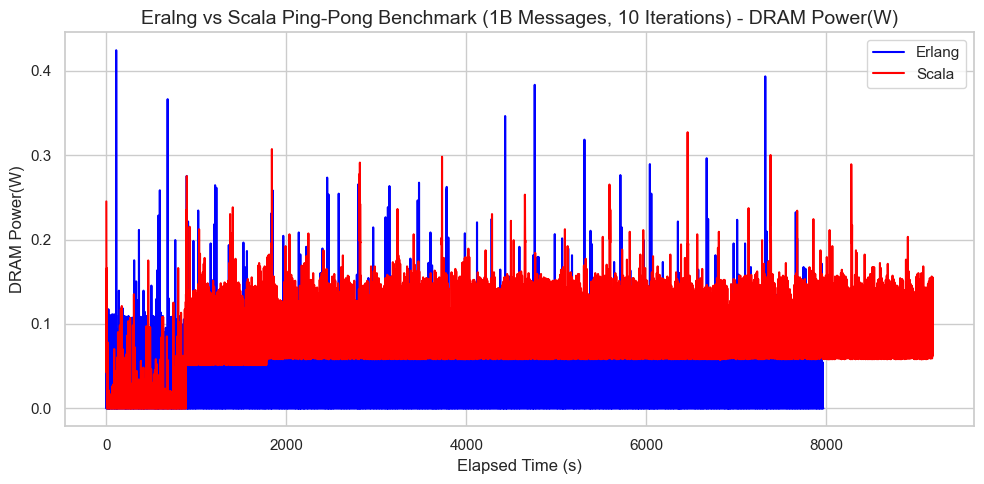

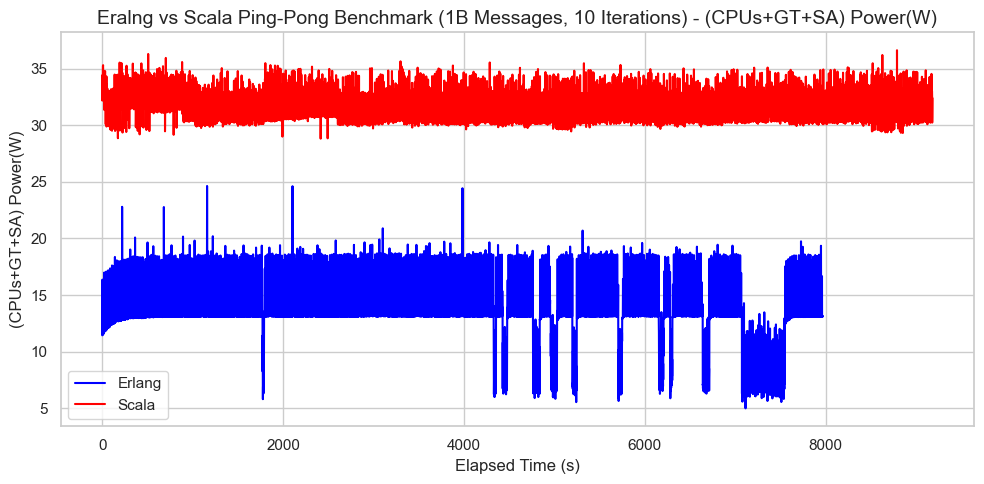

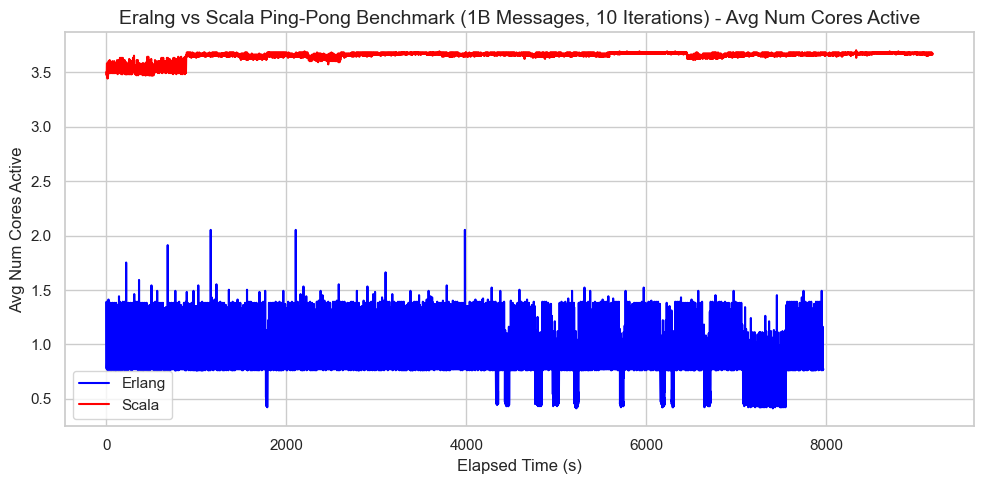

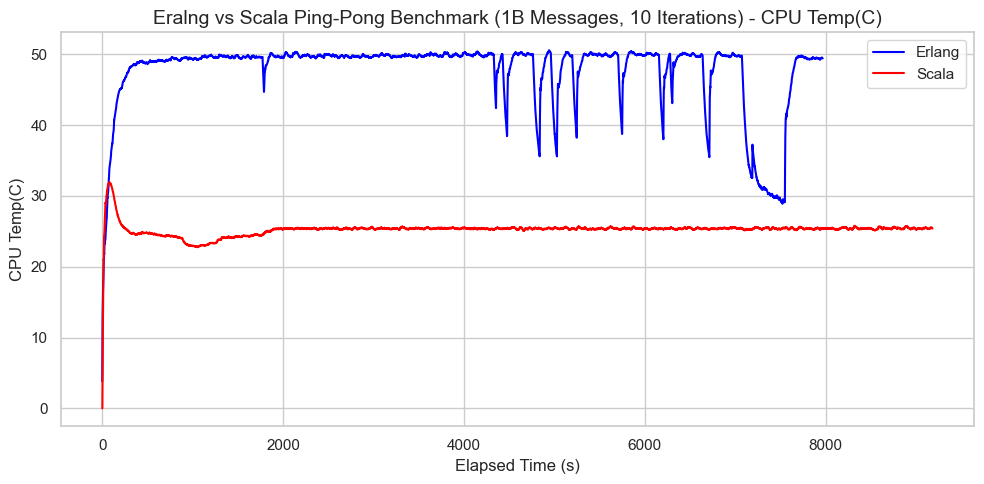

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.389199
GT Power(W)              -0.028588
DRAM Power(W)             0.064421
(CPUs+GT+SA) Power(W)    32.053841
CPU Temp(C)              25.225779
Avg Num Cores Active      3.647956
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.614218
GT Power(W)              -0.003446
DRAM Power(W)            -0.030918
(CPUs+GT+SA) Power(W)    13.079539
CPU Temp(C)              47.591068
Avg Num Cores Active      0.814695
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 294277.8387827714 Joules
Erlang Benchmark: 104203.95787865458 Joules
